<a href="https://colab.research.google.com/github/82everywin/python_review/blob/master/Practice_Crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

##### 온라인에서 판매되는 LG전자 스타일러 제품 중 리뷰수가 가장 많은 제품의
##### 제품정보(제품명, 등록일, 최저/최고 가격), 평점, 평점 별 리뷰 수를 엑셀 표로 정리하시오.

In [ ]:
driver = webdriver.Chrome()
driver.get('https://search.shopping.naver.com/catalog/40600934618?cat_id=50000151&frm=PBRSTCT&query=&fromWhere=BRANDSTORE&NaPm=ct%3Dlnoam2nk%7Cci%3D4d6c358764ed9537f9d2f3cc5168054de95d65d3%7Ctr%3Dsls%7Csn%3D95694%7Chk%3Dbadce3b7273ee47055488269f1ca152553d6ad6c')

In [ ]:
from bs4 import BeautifulSoup
import time
import pandas as pd
import selenium.common.exceptions
soup = BeautifulSoup(driver.page_source) # html 읽어오기

<html lang="ko"><head><meta content="width=device-width" name="viewport"/><meta charset="utf-8"/><title>LG전자 LG그램 16Z90R-GA5JK : 네이버 쇼핑</title><link href="https://ssl.pstatic.net/shoppingsearch/static/pc/pc-231012-101024/img/favicon.ico" rel="shortcut icon"/><meta content="LG전자 LG그램 16Z90R-GA5JK : 네이버 쇼핑" property="og:title"/><meta content="화면크기 : 40.64cm(16인치), 무게 : 1.199kg, 종류 : 코어i5 13세대, 출시OS : 윈도우11 홈, 코어종류 : 12코어(4P+8E), 인텔 GPU : Iris Xe Graphics, 램 : 16GB, SSD : 256GB, 코드명 : 랩터레이크, 해상도 : 2560x1600(WQXGA), CPU : 코어i5-1340P, 칩셋 제조사 : 인텔, CPU속도(기본클럭) : 1.9GHz, 터보부스트(최대클럭) : 4.6GHz, 메모리 타입 : LPDDR5, 그래픽 메모리 : 시스템 메모리 공유, 패널 : IPS패널(광시야각), 화면비율 : 16대10, 디스플레이 종류 : LCD, 밝기 : 350nit, bit유형 : 64, 패널코팅 : 안티글레어, 무선랜 : 802.11ax(Wi-Fi 6E), 블루투스 : 블루투스5.1, 영상출력 : HDMI, 단자 : USB Type C, 카드 슬롯 : MicroSD카드, 부가기능 : 키보드라이트, SSD 인터페이스 : NVMe, 배터리 타입 : 리튬이온, 배터리용량 : 80Wh, 웹카메라 : 전면, 스피커 : 스테레오스피커, 사운드 : 돌비Atoms오디오, 두께 : 1.68cm, DCI-P3 : 99%, 입력장치 : 숫자키패드, 보안기능 : 얼굴인식, 출시년도 : 2023년" property="og:des
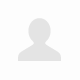
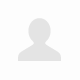

In [ ]:
soup

# DataFrame으로 저장할 column값 확인
제품명 등록일 평점 평점별 리뷰수 (5~1점)

In [ ]:
product_name = soup.select_one('h2').text
product_upload = soup.select('.top_cell__5KJK9')[2].text
product_star = soup.find(class_='top_grade__bvwhB').text[2:]
star_point=[]

for i in range(5,0,-1):
    if soup.find('a',{'data-nclick':'N=a:rev.grd'+str(i)})!=None:
        count = soup.find('a',{'data-nclick':'N=a:rev.grd'+str(i)}).text[4:-1]
        star_point.append(count)
    else :
        star_point.append(str(0))
        continue
star_point


['170', '2', '1', '0', '1']

In [ ]:
driver.get('https://brand.naver.com/lge/category/0ca165d104984e299a995e32559d1ffd?st=POPULAR&dt=IMAGE&page=1&size=40')

driver.find_element('xpath','//*[@id="CategoryProducts"]/ul/li[2]/a/div[1]/div/div').click()
soup= BeautifulSoup(driver.page_source)

# 다른 노트북 클릭후 total에 정보 넣기
product_name = soup.select_one('h2').text
product_upload = soup.select('.top_cell__5KJK9')[2].text
product_star = soup.find(class_='top_grade__bvwhB').text[2:]
star_point=[]

for i in range(5,0,-1):
    if soup.find('a',{'data-nclick':'N=a:rev.grd'+str(i)})!=None:
        count = soup.find('a',{'data-nclick':'N=a:rev.grd'+str(i)}).text[4:-1]
        star_point.append(count)
    else :
        star_point.append(str(0))
        continue
star_point

gram = []
gram.append (product_name)
gram.append (product_upload)
gram.append (product_star)
for i in range(len(star_point)):
    gram.append (star_point[i])

total=[]
total.append(gram)
total

ElementClickInterceptedException: Message: element click intercepted: Element <div class="_2JNWBGd-04 _3uKZ70Wwcp EnqpMc_sIs _3nJcVYiGGz">...</div> is not clickable at point (689, 479). Other element would receive the click: <div class="_3v8B6_k95s">...</div>
  (Session info: chrome=118.0.5993.71)
Stacktrace:
	GetHandleVerifier [0x00007FF6AFC78EF2+54786]
	(No symbol) [0x00007FF6AFBE5612]
	(No symbol) [0x00007FF6AFA9A64B]
	(No symbol) [0x00007FF6AFAE1A6B]
	(No symbol) [0x00007FF6AFADFE39]
	(No symbol) [0x00007FF6AFADDC08]
	(No symbol) [0x00007FF6AFADCCC3]
	(No symbol) [0x00007FF6AFAD29CF]
	(No symbol) [0x00007FF6AFAFBE6A]
	(No symbol) [0x00007FF6AFAD22E6]
	(No symbol) [0x00007FF6AFAFC080]
	(No symbol) [0x00007FF6AFB14D02]
	(No symbol) [0x00007FF6AFAFBC43]
	(No symbol) [0x00007FF6AFAD0941]
	(No symbol) [0x00007FF6AFAD1B84]
	GetHandleVerifier [0x00007FF6AFFC7F52+3524194]
	GetHandleVerifier [0x00007FF6B001D800+3874576]
	GetHandleVerifier [0x00007FF6B0015D7F+3843215]
	GetHandleVerifier [0x00007FF6AFD15086+694166]
	(No symbol) [0x00007FF6AFBF0A88]
	(No symbol) [0x00007FF6AFBECA94]
	(No symbol) [0x00007FF6AFBECBC2]
	(No symbol) [0x00007FF6AFBDCC83]
	BaseThreadInitThunk [0x00007FFDA2C17344+20]
	RtlUserThreadStart [0x00007FFDA2E426B1+33]


In [ ]:
gram = []
gram.append (product_name)
gram.append (product_upload)
gram.append (product_star)
for i in range(len(star_point)):
    gram.append (star_point[i])

gram

['LG전자 LG그램 16Z90R-GA5JK', '등록일 2023.06.', '5', '170', '2', '1', '0', '1']

In [ ]:
total=[]
total.append(gram)
total

[['LG전자 LG그램 16Z90R-GA5JK', '등록일 2023.06.', '5', '170', '2', '1', '0', '1']]

In [ ]:
LG_gram = pd.Series(gram)
LG_gram.columns=['제품명','등록일','평점','5점','4점','3점','2점','1점']
LG_gram

0    LG전자 LG그램 16Z90R-GA5JK
1              등록일 2023.06.
2                         5
3                       170
4                         2
5                         1
6                         0
7                         1
dtype: object